In [1]:
import torch
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

matplotlib.rcParams["text.usetex"] = True
matplotlib.rcParams["mathtext.fontset"] = "stix"
matplotlib.rcParams["font.family"] = "STIXGeneral"
matplotlib.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}\usepackage{amssymb}"

In [2]:
num_gen = 100

Js = ["1", "5", "100"]

all_data = {}
for M in [i for i in range(2, 11)]:
    utility_M = torch.load(f"data/utility_M{M}.pt")

    util_g_1 = utility_M["util_g_1"]
    util_g_5 = utility_M["util_g_5"]
    util_g_100 = utility_M["util_g_100"]

    util_g = {}
    util_g["1"] = util_g_1
    util_g["5"] = util_g_5
    util_g["100"] = util_g_100

    util_opt = utility_M["optimal"]
    data = {}
    for J in Js:
        log_reg_g_mean = torch.mean(torch.log(util_opt - util_g[J]), dim=0)[:num_gen]
        log_reg_g_std = torch.std(torch.log(util_opt - util_g[J]), dim=0)[:num_gen]

        data[f"log_regret_mean_{J}"] = log_reg_g_mean
        data[f"log_regret_std_{J}"] = log_reg_g_std

    all_data[M] = data

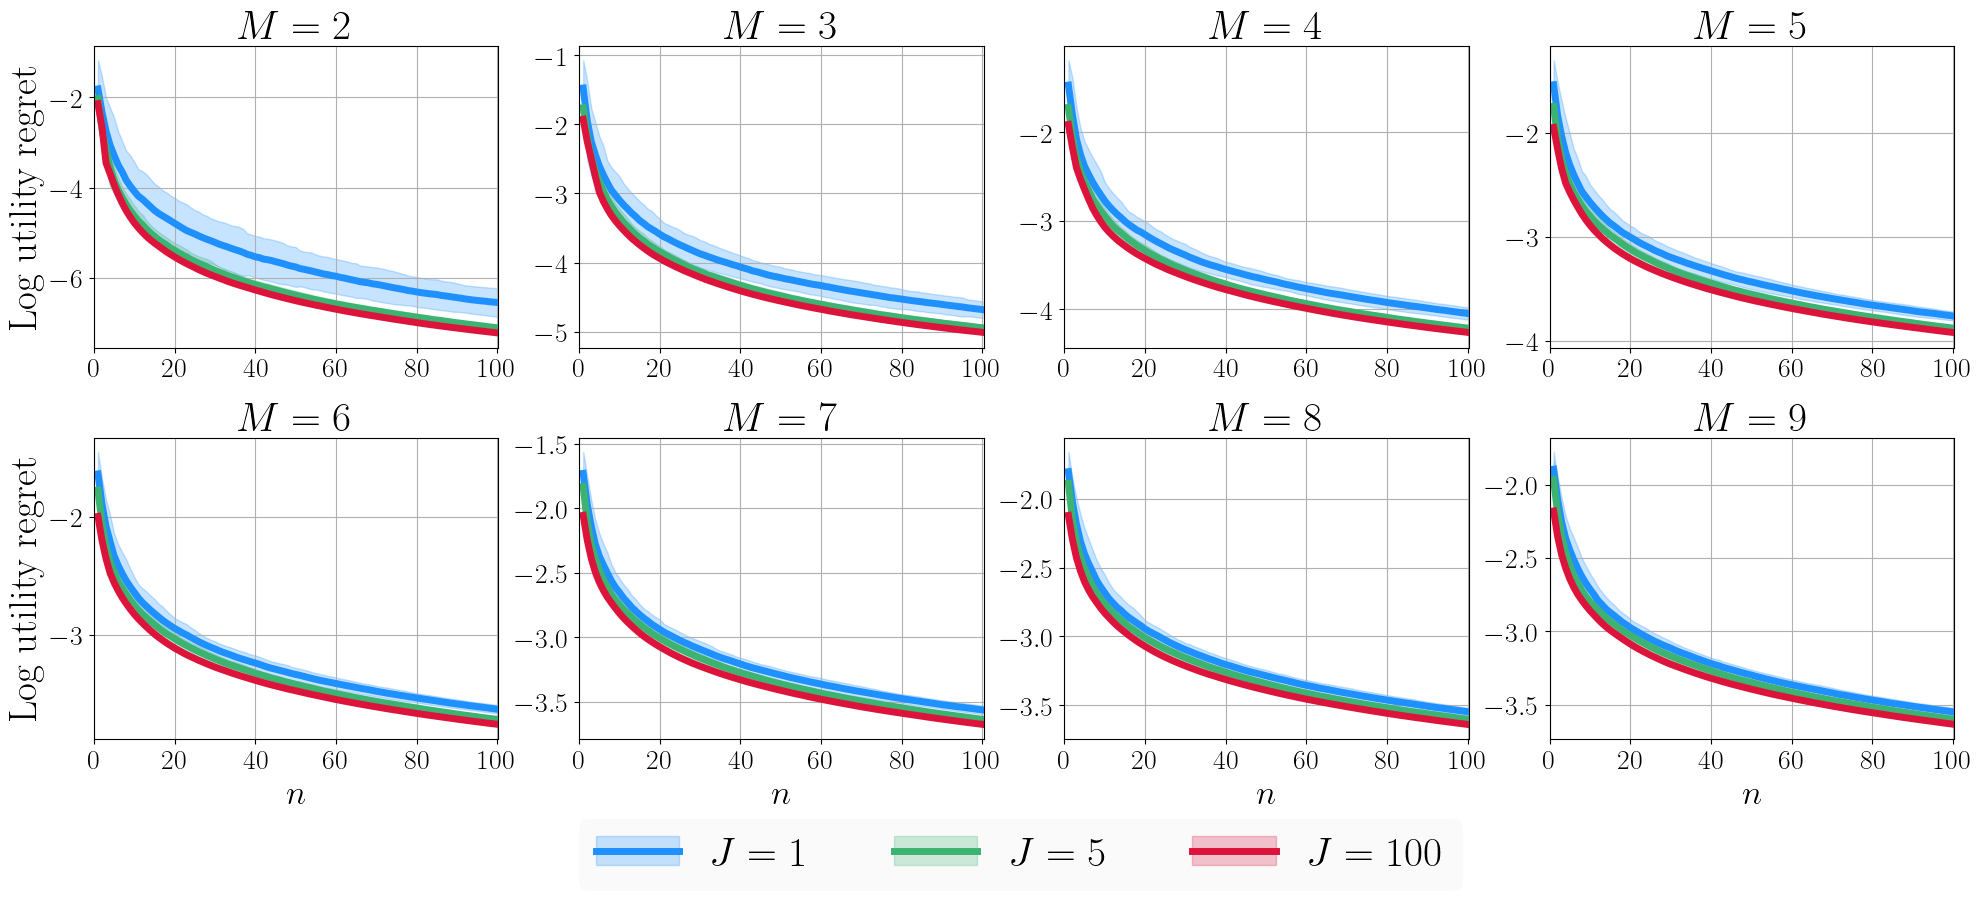

In [3]:
Ms = [i for i in range(2, 11)]
colors = ["dodgerblue", "mediumseagreen", "crimson", "brown"]
num_iterations = 100

num_rows = 2
num_cols = 4

fig, axes = plt.subplots(num_rows, num_cols, figsize=(24, 9))
plt.subplots_adjust(
    left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.3
)

for i in range(num_rows):
    for j in range(num_cols):
        idx = num_cols * i + j

        if num_rows == 1:
            ax = axes[j]
        else:
            ax = axes[i, j]

        data_M = all_data[Ms[idx]]
        n = torch.linspace(1, num_iterations, num_iterations)
        for k, J in enumerate(["1", "5", "100"]):

            log_reg_g_mean = data_M[f"log_regret_mean_{J}"]
            log_reg_g_std = data_M[f"log_regret_std_{J}"]

            ax.plot(n, log_reg_g_mean, linewidth=5, color=colors[k], label=f"J={J}")
            ax.fill_between(
                n,
                log_reg_g_mean + 2 * log_reg_g_std,
                log_reg_g_mean - 2 * log_reg_g_std,
                alpha=0.25,
                color=colors[k],
            )

        ax.tick_params(axis="both", labelsize=20)
        ax.set_xlim(0.75, num_iterations + 0.25)

        ax.set_title(rf"$M={Ms[idx]}$", fontsize=30)
        ax.set_xticks([0, 20, 40, 60, 80, 100])

        if j == 0:
            ax.set_ylabel(r"Log utility regret", fontsize=28)
        if i == num_rows - 1:
            ax.set_xlabel(r"$n$", fontsize=25)

        ax.grid(alpha=1)


blue_line = mlines.Line2D([], [], color="dodgerblue", linestyle="-", linewidth=5)
blue_patch = mpatches.Patch(color="dodgerblue", alpha=0.25)

green_line = mlines.Line2D([], [], color="mediumseagreen", linestyle="-", linewidth=5)
green_patch = mpatches.Patch(color="mediumseagreen", alpha=0.25)

red_line = mlines.Line2D([], [], color="crimson", linestyle="-", linewidth=5)
red_patch = mpatches.Patch(color="crimson", alpha=0.25)

labels = [r"$J=1$", r"$J=5$", r"$J=100$"]

axes[1, 0].legend(
    handles=[(blue_line, blue_patch), (green_line, green_patch), (red_line, red_patch)],
    labels=labels,
    loc=(1.2, -0.5),
    ncol=num_cols,
    fontsize=30,
    facecolor="k",
    framealpha=0.02,
)

plt.show()